#Analisis Kebutuhan Bantuan Sosial Berdasarkan Lokasi

In [50]:
import pandas as pd
import numpy as np

# Mengimpor data (gantilah dengan path ke file CSV Anda)
data_path = 'bantuanSosial.csv'
df = pd.read_csv(data_path, delimiter=';')

# Tampilkan beberapa baris pertama data untuk memahami strukturnya
df.head()


,no,Jenis Penugasan,kluster,ragam,provinsi,kab/kota,latitude,longitude,Tahun Pendataan,Jenis Bantuan,Dampak
0,1,Non-Residensial,Anak,AMPK,NTT,Kota Kupang,-10.21667,123.60000,2024,Perlengkapan Sekolah,Peningkatan akses pendidikan dan dukungan akad...
1,2,Non-Residensial,Anak,AMPK,NTT,Kab. Alor,-8.30000,124.56667,2024,Sembako,Peningkatan akses makanan dan pengurangan beba...
2,3,Non-Residensial,Lansia,Lanjut Usia,NTT,TTS,-9.47167,124.80472,2024,Nutrisi,Peningkatan kesehatan dan kesejahteraan pribadi
3,4,Non-Residensial,Lansia,Lanjut Usia,NTT,Kab. Nagekeo,-8.87210,121.20963,2024,Kewirausahaan,Peningkatan pendapatan dan kemandirian usaha
4,5,Non-Residensial,Penyandang Disabilitas,Fisik,NTT,Kab. Malaka,-9.56320,124.89481,2024,Nutrisi,Peningkatan kesehatan dan kesejahteraan pribadi


In [51]:
# Menghapus kolom yang tidak relevan atau yang memiliki nilai kosong
df_cleaned = df.drop(columns=['no'])

# Mengonversi data kategorikal menjadi numerikal menggunakan encoding
df_encoded = pd.get_dummies(df_cleaned, drop_first=True)

# Normalisasi data jika diperlukan
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

# Tampilkan data setelah preprocessing
df_encoded.head()

,latitude,longitude,Tahun Pendataan,Jenis Penugasan_RESIDENSIAL,Jenis Penugasan_Residensial,kluster_Kelompok Rentan,kluster_Lansia,kluster_Penyandang Disabilitas,kluster_anak,ragam_AMPK,...,"Dampak_Peningkatan akses pendidikan, dukungan akademik, dan peningkatan kesehatan",Dampak_Peningkatan aksesibilitas dan kemandirian,Dampak_Peningkatan kesehatan dan kesejahteraan pribadi,Dampak_Peningkatan kesehatan dan kualitas hidup,Dampak_Peningkatan kesehatan dan rasa percaya diri,Dampak_Peningkatan kesehatan fisik dan kesejahteraan,Dampak_Peningkatan keseimbangan dan mobilitas,Dampak_Peningkatan kualitas pendengaran,Dampak_Peningkatan pendapatan dan kemandirian usaha,Dampak_Peningkatan pendapatan dan ketahanan pangan
0,-10.21667,123.60000,2024,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,-8.30000,124.56667,2024,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,-9.47167,124.80472,2024,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,-8.87210,121.20963,2024,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,-9.56320,124.89481,2024,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False


In [52]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Menentukan jumlah cluster
num_clusters = 4  # Misalnya 4 kluster, bisa disesuaikan

# Membuat model KMeans
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(df_scaled)

# Menambahkan kolom cluster ke data asli
df['Cluster'] = clusters

# Menampilkan hasil cluster
df[['provinsi', 'kab/kota', 'Cluster']].head()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,provinsi,kab/kota,Cluster
0,NTT,Kota Kupang,2
1,NTT,Kab. Alor,2
2,NTT,TTS,0
3,NTT,Kab. Nagekeo,2
4,NTT,Kab. Malaka,2


In [53]:
import folium
from folium.plugins import MarkerCluster

# Membuat peta dasar
map_base = folium.Map(location=[-8.5, 117], zoom_start=6)  # Koordinat NTT sebagai pusat peta

# Mengelompokkan marker pada peta
marker_cluster = MarkerCluster().add_to(map_base)

# Menambahkan marker ke peta dengan koordinat sebenarnya
for i, row in df.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f'{row["kab/kota"]}<br>Cluster: {row["Cluster"]}',
        icon=folium.Icon(color='blue' if row['Cluster'] == 0 else 'green')
    ).add_to(marker_cluster)

# Menyimpan peta sebagai HTML
map_base.save('/content/bantuan_sosial_map.html')

# # Menampilkan peta di Colab
# from IPython.display import IFrame
# IFrame('/content/bantuan_sosial_map.html', width=800, height=600)


In [54]:
from sklearn.metrics import silhouette_score

# Menghitung silhouette score untuk menilai kualitas kluster
score = silhouette_score(df_scaled, clusters)
print(f'Silhouette Score: {score}')


Silhouette Score: 0.0693798704999924


In [55]:
from sklearn.cluster import DBSCAN

# Membuat model DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters_dbscan = dbscan.fit_predict(df_scaled)

# Evaluasi DBSCAN dengan Silhouette Score
score_dbscan = silhouette_score(df_scaled, clusters_dbscan)
print(f'Silhouette Score DBSCAN: {score_dbscan}')


Silhouette Score DBSCAN: 0.8456659468439846


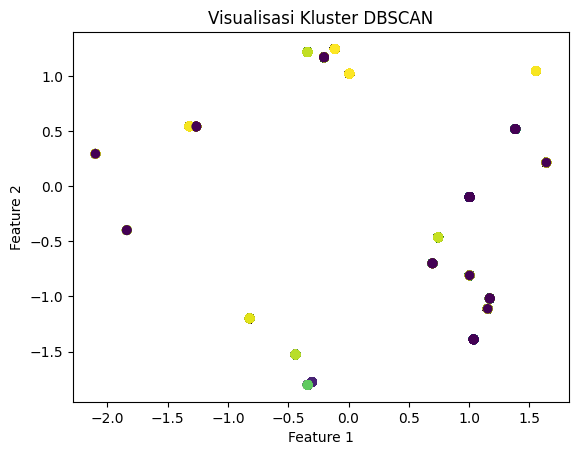

In [56]:
import matplotlib.pyplot as plt

# Visualisasi 2D dari hasil clustering
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=clusters_dbscan, cmap='viridis')
plt.title('Visualisasi Kluster DBSCAN')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [57]:
import joblib

# Simpan model DBSCAN ke dalam file
joblib.dump(dbscan, 'dbscan_model.pkl')

# Verifikasi model tersimpan
print("Model DBSCAN telah disimpan sebagai 'dbscan_model.pkl'")


Model DBSCAN telah disimpan sebagai 'dbscan_model.pkl'


#Prediksi Dampak Bantuan Sosial

In [67]:
# Import pustaka yang dibutuhkan
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

# 1. Load data (ganti dengan path dataset bantuan sosial kamu)
df = pd.read_csv('bantuanSosial.csv', delimiter=';')

# 2. Preprocessing Data
# Kita encode fitur kategori menjadi numerik
le_jenis_bantuan = LabelEncoder()
le_kluster = LabelEncoder()
le_ragam = LabelEncoder()
le_dampak = LabelEncoder()

df['Jenis Bantuan Encoded'] = le_jenis_bantuan.fit_transform(df['Jenis Bantuan'])
df['Kluster Encoded'] = le_kluster.fit_transform(df['kluster'])
df['Ragam Encoded'] = le_ragam.fit_transform(df['ragam'])
df['Dampak Encoded'] = le_dampak.fit_transform(df['Dampak'])

# Pilih fitur yang akan digunakan untuk prediksi
X = df[['Jenis Bantuan Encoded', 'Kluster Encoded', 'Ragam Encoded', 'Tahun Pendataan']]  # Fitur input
y = df['Dampak Encoded']  # Variabel target, ganti dengan kolom target dampak di dataset

# 3. Split data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Buat dan latih model regresi linier
model = LinearRegression()
model.fit(X_train, y_train)

# 5. Prediksi pada data uji
y_pred = model.predict(X_test)

# 6. Evaluasi model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 Score): {r2}")

# Jika ingin memprediksi dampak bantuan baru
# Contoh prediksi menggunakan data baru
new_data = np.array([[1, 2, 3, 2023]])  # Contoh input baru dengan fitur yang sudah di-encode
predicted_dampak = model.predict(new_data)
print(f"Prediksi Dampak: {predicted_dampak}")


Mean Squared Error (MSE): 13.371150712485957
R-squared (R2 Score): 0.0978556724807993
Prediksi Dampak: [7.89159695]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [68]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Buat dan latih model Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Prediksi pada data uji
y_pred_rf = rf_model.predict(X_test)

# Evaluasi model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Mean Squared Error (MSE) Random Forest: {mse_rf}")
print(f"R-squared (R2 Score) Random Forest: {r2_rf}")


Mean Squared Error (MSE) Random Forest: 0.036546887421357095
R-squared (R2 Score) Random Forest: 0.9975342012153918


In [69]:
import joblib

# Simpan model Random Forest ke dalam file
joblib.dump(rf_model, 'random_forest_model.pkl')


['random_forest_model.pkl']